In [1]:
'''
Notebook para asociar una velocidad de viento a una curva de potencia ideal con un rango de error por definir
'''

'\nNotebook para asociar una velocidad de viento a una curva de potencia ideal con un rango de error por definir\n'

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
#importa las fuciones que cree desde otro notebook (instalar modulo ipynb)
import ipynb.fs.defs.my_funcs_clusters as myfunc
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from matplotlib import rc, font_manager
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython import display as dpy



In [3]:
lsPath = 'C:/Users/mungu/Documents/DatosWTG.xlsx'
xlsPathMfgCurve = 'C:/Users/mungu/Dropbox/Doctorado/Python/aero/Curva de potencia vestas 90.xlsx'
dataVDP,dfVecVel,dfMfgCurve = myfunc.raw_to_datafr(lsPath,xlsPathMfgCurve)
dataVP = dataVDP.drop('Dir',axis=1)

Total de registros: 52848
Numero de filas sin datos
vViento    312
Pacw       312
dtype: int64


# Encontrar la relación viento-potencia

Quiero saber por cada x cantidad de viento, cuanta potencia sube

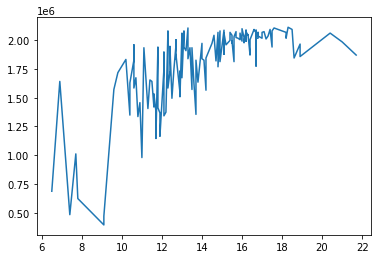

In [4]:
fechaini = '2016-01-01 00:00:00'
fechafin= '2016-01-01 23:59:59'
dataVP1Dia = dataVP.loc[fechaini:fechafin]
dataVP1Dia_ord=dataVP1Dia.sort_values(by=['vViento'])
plt.plot(dataVP1Dia_ord.vViento,dataVP1Dia_ord.Pw)

In [16]:
dataVP1Dia

,vViento,Pw
PCTimeStamp,,
2016-01-01 00:00:00,12.700,1953049.613
2016-01-01 00:10:00,14.800,2067560.665
2016-01-01 00:20:00,16.200,2048475.490
2016-01-01 00:30:00,14.900,2080284.115
2016-01-01 00:40:00,16.200,2073922.390
...,...,...
2016-01-01 23:10:00,13.000,1673133.707
2016-01-01 23:20:00,12.100,1342324.001
2016-01-01 23:30:00,10.400,1348685.726


SelectionSlider(continuous_update=False, description='Dia:', options=(Timestamp('2016-01-01 00:00:00', freq='D…

Output()

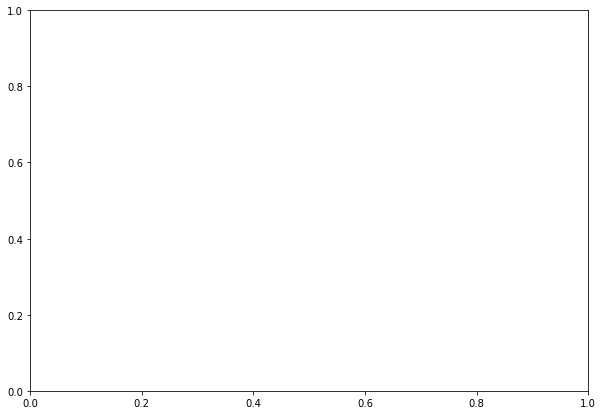

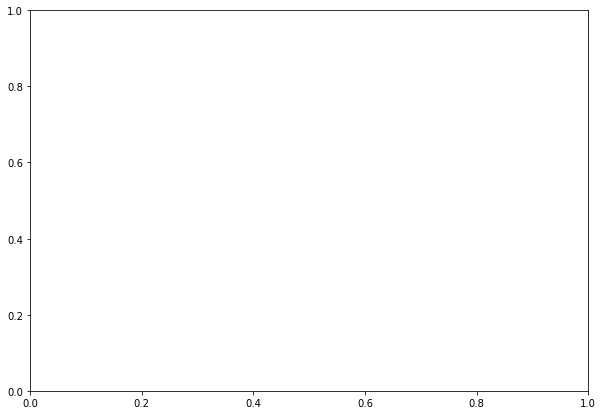

In [6]:
#porque son las tres de la mañana, se salta el primer dia
#HORRIBLE CODIGO
rango_fechas = pd.date_range(dataVP.index[0],dataVP.index[-1])

###########   widgets #########

sslider =widgets.SelectionSlider(
    options=rango_fechas,
    description='Dia:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
)

output3= widgets.Output()

display(sslider, output3)

############ funcion y ploteo###############
plt.ioff()
fig = plt.figure(figsize=(10,7))
axes = fig.add_subplot(111)

hfig = display(fig, display_id=True)
def on_value_change3(change,):
    with output3:
        #no sirve si la fecha y hora exacta no existe
        dia=dataVP.loc[change['new']:change['new']+pd.Timedelta(1,'day')]
        dia_ord = dia.sort_values(by='vViento')
        #ax.set_xdata(dia_ord.vViento)
        #ax.set_ydata(dia_ord.Pw)
        axes.cla()
        axes.plot(dia_ord.vViento,dia_ord.Pw)
        axes.set_xlim([0,30])
        axes.set_ylim([-40e3,2.2e6])
        fig.canvas.draw()
        hfig.update(fig)

sslider.observe(on_value_change3, names='value')

In [7]:
#Recolectando datos
#numero de dias
d1 =dataVP.index[0]
d2=dataVP.index[-1]
n =d2-d1
ndias_total=n.days


# Observando la variacion entre velocidades de viento iguales y potencia

In [8]:
#buscar valores unicos de velocidad de viento
vv_unic= np.sort(dataVP.vViento.unique())
a =vv_unic
b =np.round(np.arange(0.1,27.7,0.1),decimals=1)
c= list(set(a)  ^ set(b))
print('Deberian ser %d velocidades, pero son %d'%(len(b),len(a)))
print('Faltan %d velocidades'%(len(c)))
print('Las velocidades que faltan son:')
print(*c, sep = ", ") 


Deberian ser 276 velocidades, pero son 274
Faltan 2 velocidades
Las velocidades que faltan son:
26.8, 27.3


In [9]:
d = dataVP.loc[dataVP.vViento==vv_unic[100]]
d

,vViento,Pw
PCTimeStamp,,
2016-01-06 04:40:00,10.1,1.221451e+06
2016-01-06 05:30:00,10.1,1.514091e+06
2016-01-10 04:40:00,10.1,1.577708e+06
2016-01-11 10:00:00,10.1,1.692219e+06
2016-01-12 07:40:00,10.1,9.160884e+05
...,...,...
2016-12-14 08:50:00,10.1,1.030599e+06
2016-12-15 10:20:00,10.1,1.030599e+06
2016-12-16 09:30:00,10.1,1.157834e+06


SelectionSlider(continuous_update=False, description='Velocidad:', options=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,…

Output()

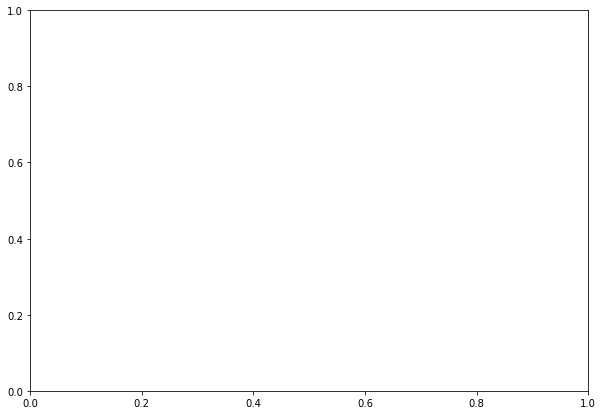

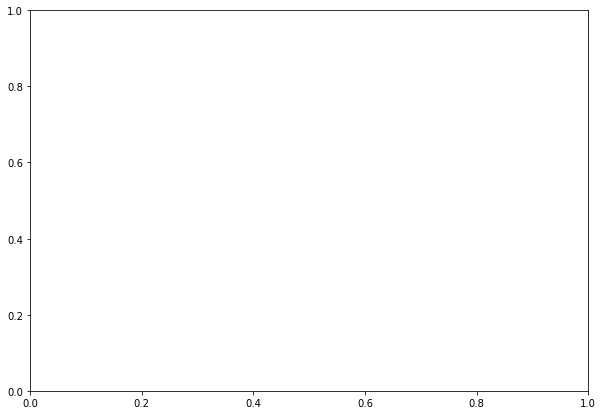

In [10]:
#porque son las 5:30 de la mañana, se salta el primer dia
#HORRIBLE CODIGO
#no se ordenand las velocidades de viento por potencia,debe ser por hora de lectura

###########   widgets #########

sslidervv =widgets.SelectionSlider(
    options=vv_unic,
    description='Velocidad:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
)

outputvv= widgets.Output()

display(sslidervv, outputvv)

############ funcion y ploteo###############
plt.ioff()
fig = plt.figure(figsize=(10,7))
axes = fig.add_subplot(111)

hfig = display(fig, display_id=True)
def on_value_changevv(change,):
    with outputvv:
        #no sirve si la fecha y hora exacta no existe
        vv_pw=dataVP.loc[dataVP.vViento==change['new']]
        df_describe =vv_pw.describe()
        #convertir el describe a texto y ponerlo en formato cientifico para la tabla
        describe_sci =[[format(element,'.2E') for element in el] for el in df_describe.values.tolist()]

        axes.cla()
        axes.plot(vv_pw.index,vv_pw.Pw)
        axes.table(describe_sci, colLabels=df_describe.columns,rowLabels=df_describe.T.columns)
        axes.tick_params(axis='x', pad=-20)
        axes.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

        #axes.set_xlim([0,30])
#         axes.set_ylim([-40e3,2.2e6])
        fig.canvas.draw()
        hfig.update(fig)
sslidervv.observe(on_value_changevv, names='value')

In [11]:
h =dataVP.loc[dataVP.vViento==20]
a =h.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
a
b=a.values

In [12]:
b.tolist()

[[60.0, 60.0],
 [20.0, 1841507.3657547294],
 [0.0, 313169.05786625034],
 [20.0, -25446.900494077323],
 [20.0, 1863985.461191164],
 [20.0, 1908517.5370557993],
 [20.0, 1972134.7882909926],
 [20.0, 2061198.9400202632]]

In [13]:
d =list(map(len,b.tolist()))
d


[2, 2, 2, 2, 2, 2, 2, 2]

In [14]:
[[format(element,'1.2E') for element in el] for el in b.tolist()]


[['6.00E+01', '6.00E+01'],
 ['2.00E+01', '1.84E+06'],
 ['0.00E+00', '3.13E+05'],
 ['2.00E+01', '-2.54E+04'],
 ['2.00E+01', '1.86E+06'],
 ['2.00E+01', '1.91E+06'],
 ['2.00E+01', '1.97E+06'],
 ['2.00E+01', '2.06E+06']]

# Interpolacion de la curva del fabricante

<AxesSubplot:xlabel='velocidad'>

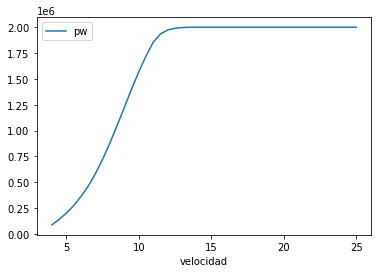

In [15]:
dfMfgCurve.plot()
